In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
#from sklearn.cluster import Kmeans

In [ ]:

#df = pd.read_csv("Mall_Customers.csv")
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# New Section

In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#annual income and spending as X matrix
x=df.iloc[:,[3,4]].values

In [ ]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
##Configurations / Settings

In [ ]:
#number of training samples
m= x.shape[0]

#number of features
n= x.shape[1]

#choosing the number of iteration whih guarantee convergence 
'''
    Considerations
    1. Number of datasets count == 100th
    2. We could choose 1000 however, it's better to start small 
'''
n_iterations = 100

#number of clusters 
K = 5

In [ ]:
#Step 1. Initialize the centroids randomly 
import random as rd
centroids = np.array ([]).reshape(n, 0)
'''
    Horizontal Concatenation
    numpy c_ == https://stackoverflow.com/questions/10894323/what-does-the-c-underscore-expression-c-do-exaclty
'''

for i in range(5):
    rand=rd.randint(0, m-1) #random
    centroids=np.c_[centroids, x[rand]] #randomize centroids
 


In [ ]:
#Step 2a. From each training sample
'''
    2.1 Compute the euclidean distance of centroid
    2.2 Assign the cluster based on the minimal distance 
    2.3 Expected output should be in a dictionary with clusters 
'''

#Initialize Dictionary

output = {}

'''
    2.4 Find the euclidean distance (ED) from each point to all centroids 
    2.5 Store in a m X K matrix --> Every row in ED will have distance from all the centroids
    2.6 Find the minimum distance and store the index of the column in a vector C 
'''
ED = np.array([]).reshape(m, 0)

for k in range (K):
    temporary_distance = np.sum((x-centroids[:, k])**2, axis=1)
    #ED = np.c_(ED, temporary_distance)
    ED = np.c_[ED, temporary_distance]
    
C = np.argmin(ED, axis = 1)+1


In [ ]:
#Step 2b.
'''
    2.7 regroup the data points based on the cluster index C
    2.8 Store in an output dictionary (2.7)
    2.9 Compute the mean of separated clusters (2.8)
    3.0 Assign new centroids from (2.9)
'''

Y = {}
for k in range(K):
    Y[k+1] = np.array([]).reshape(2,0)
    
    #Horizontal Concatenation, regrouping -> clustered index C
for i in range(m):
    Y[C[i]] = np.c_[Y[C[i]], x[i]]
    
    #Tranpose 
for k in range(K):
    Y[k+1] = Y[k+1].T
                      
    #Mean Computation & New Assigned centroid
for k in range(K):
    centroids[:, k]= np.mean(Y[k+1], axis=0)
            
output = Y

In [ ]:
from collections import defaultdict
Output=defaultdict()
Output={}

In [ ]:
#Combining Step 2a &2b

for i in range(n_iterations):
    
    #step 2a.
    ED = np.array([]).reshape(m, 0)
    for k in range(K):
        temporary_distance = np.sum((x-centroids[:,k])**2, axis=1)
        #ED = np.c_(ED, temporary_distance)
        ED = np.c_[ED, temporary_distance]
        
    C = np.argmin(ED, axis=1)+1
    
    #stem 2b.
    
    Y={}
    
    for k in range(K):
        #
        Y[k+1] = np.array([]).reshape(2,0)
        
    for i in range(m):
        #Horizontal Concatenate
        Y[C[i]] = np.c_[Y[C[i]], x[i]]
        
    for k in range(K):
        #Tranpose 
        Y[k+1] = Y[k+1].T
        
    for k in range(K):
        #Average Mean
        centroids[:, k] = np.mean (Y[k+1], axis=0)
    
    Output = Y
    

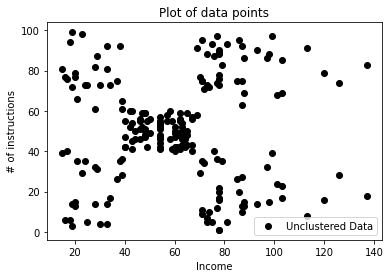

In [ ]:
#Raw Data 

plt.scatter(x[:, 0], x[:, 1], c='black', label='Unclustered Data')
plt.xlabel('Income')
plt.ylabel('# of instructions')
plt.legend()
plt.title('Plot of data points')
plt.show()

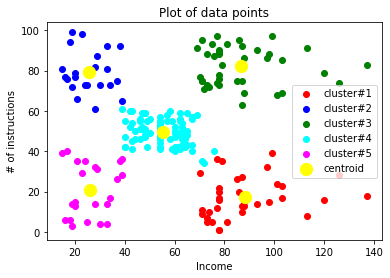

In [ ]:
#Clustered Data

color = ['red', 'blue', 'green', 'cyan', 'magenta']
labels = ['cluster#1', 'cluster#2', 'cluster#3', 'cluster#4', 'cluster#5' ]

for k in range(K):
    plt.scatter(Output[k+1][:,0],
                 Output [k+1][:,1],
                 c=color[k],
                 label=labels[k])
          
plt.scatter(centroids[0,:] , centroids[1,:], s=150, c='yellow', label='centroid')
plt.xlabel('Income')
plt.ylabel('# of instructions')
plt.legend()
plt.title('Plot of data points')
plt.show()
          